<a href="https://colab.research.google.com/github/nandy004/CODSOFT/blob/main/sales%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:

df=pd.read_csv('/content/Advertising.csv')


In [3]:

df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df['Sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

<Axes: xlabel='Sales', ylabel='count'>

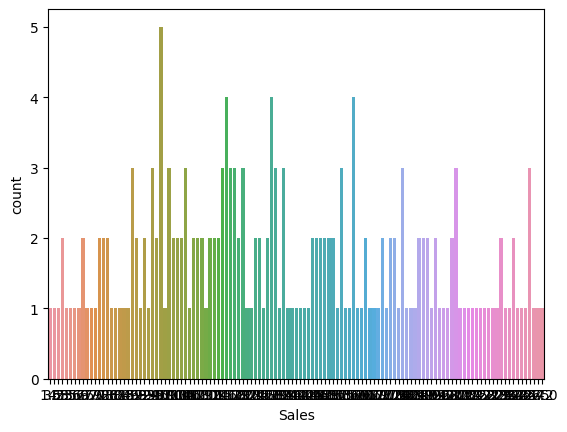

In [9]:

sns.countplot(x='Sales',data=df)

<Axes: >

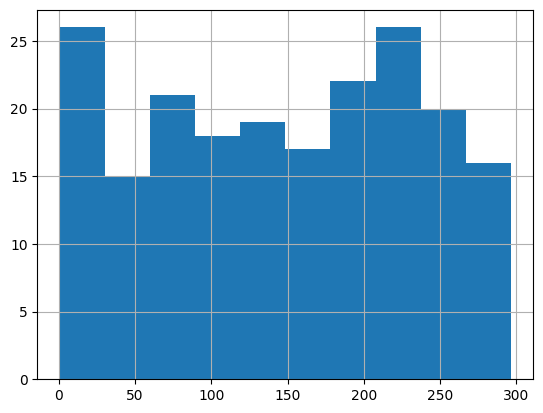

In [10]:

df['TV'].hist()

<Axes: >

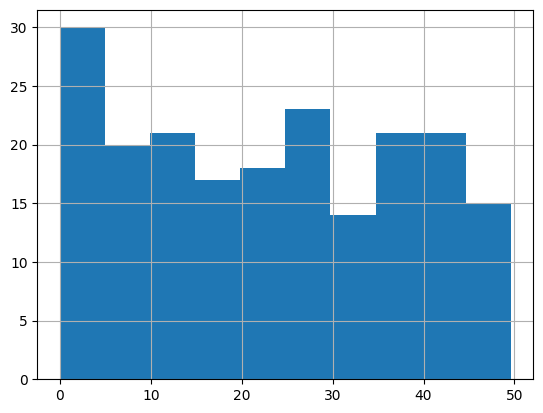

In [11]:
df['Radio'].hist()


<Axes: >

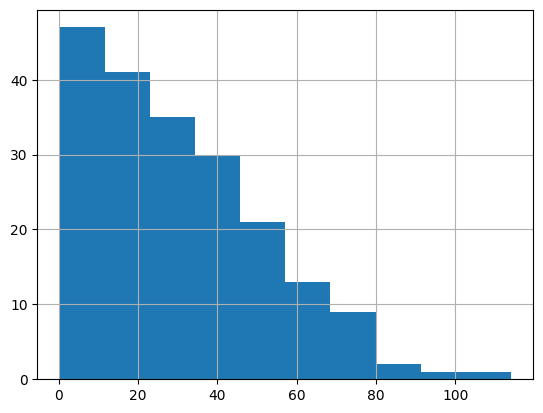

In [12]:

df['Newspaper'].hist()

<Axes: >

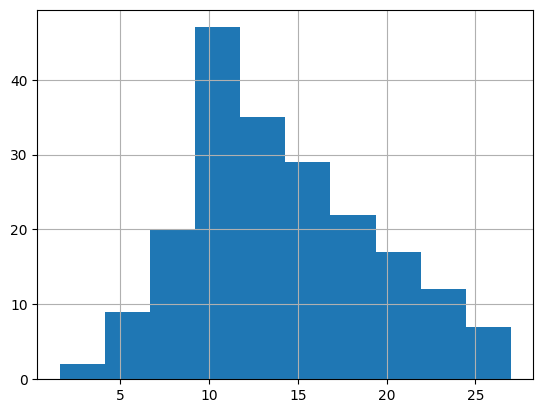

In [13]:

df['Sales'].hist()

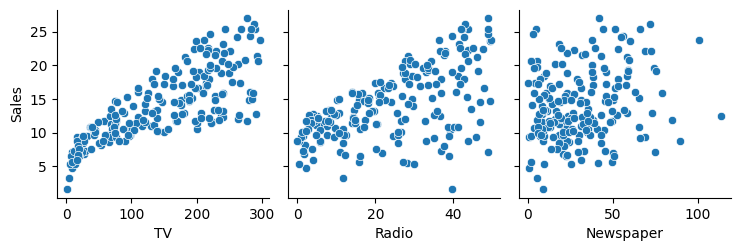

In [14]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

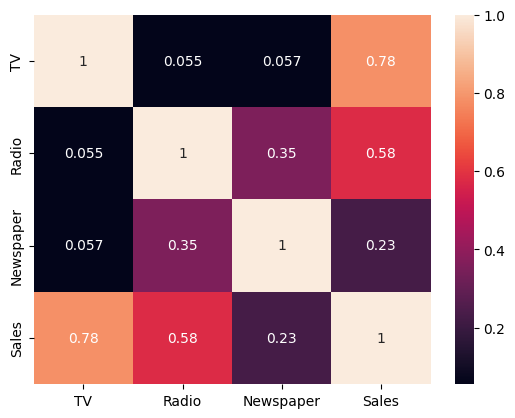

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:


x=df.drop(columns=['Sales'])
y=df['Sales']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=2)



In [17]:


print(x.shape, x_train.shape ,x_test.shape)

(200, 3) (140, 3) (60, 3)


In [18]:

print(x_train)


        TV  Radio  Newspaper
28   248.8   27.1       22.9
133  219.8   33.5       45.1
94   107.4   14.0       10.9
42   293.6   27.7        1.8
169  284.3   10.6        6.4
..     ...    ...        ...
43   206.9    8.4       26.4
22    13.2   15.9       49.6
72    26.8   33.0       19.3
15   195.4   47.7       52.9
168  215.4   23.6       57.6

[140 rows x 3 columns]


In [19]:
print(y_train)

28     18.9
133    19.6
94     11.5
42     20.7
169    15.0
       ... 
43     12.9
22      5.6
72      8.8
15     22.4
168    17.1
Name: Sales, Length: 140, dtype: float64


In [20]:

model=LinearRegression()


In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:

x_train_prediction=model.predict(x_train)

In [23]:
print(x_train_prediction)

[19.51857099 19.49721831 10.64402116 21.52580564 18.05706795 10.45953556
 18.75021972  6.47775797  4.00190748  9.18004661 10.81626048 10.88530957
 15.46627328  9.98361123 12.55876191  7.07288911  4.89409936  9.97633733
 14.47752124 18.71009025 23.34545845 23.22746141 14.72814677 12.619088
 17.02872789 20.9001803  17.25170423 10.37935966 24.30346078 16.05135188
 18.4454544  10.63427061 15.59949508 19.42717559 13.87070907 21.87758155
 15.57260593 23.47050862 18.12493713 14.26555399 15.37168419  6.87592782
 19.48985061  8.58330601 21.63404856 10.50768032 15.04617074 21.50490489
 13.59285317 16.44585401  4.95480296 17.12554776 14.72509778 12.93764606
 17.39177543 12.3931486  13.83307493 10.46444416  8.3874551  15.92736486
 10.2212787  20.8439576  10.12319535 15.50582448 23.86025106  9.42844127
 11.17951988 13.87309612 23.10561429 15.06481177 18.99220496  8.32228563
  8.82568951 14.29615719 11.69030549 17.99043486  6.101233    7.82151558
 16.60496467  9.91625487  4.84078855 18.35488274 15.0

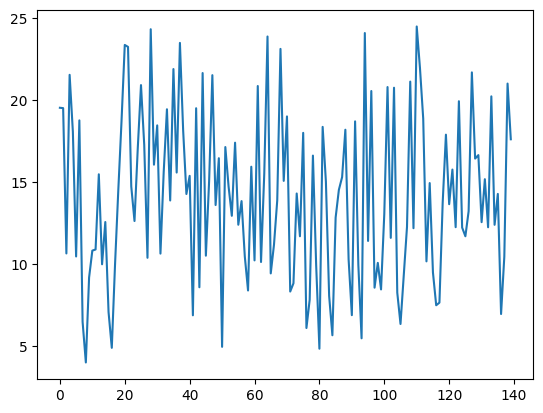

In [24]:

plt.plot(x_train_prediction)

In [25]:

y_pred = model.predict(x_test)


In [26]:

print(y_pred)

[13.94907499  9.52733425  6.94499797 15.33585992 18.33660639 15.70709398
  7.37712266 20.41063959 13.22917692 17.19324668 10.99928618 19.4941742
  9.01738919 10.85241702 13.98813422 12.66410917  9.21710338 17.87968235
 16.48325526 18.68043321 16.77238059 15.89279011 11.83761128 12.22333243
 15.01658786 12.19296155 15.39269865  7.98356454 16.68226915 13.89775647
 16.33324843 17.02351451 12.86915432 12.92867261  8.84984276 10.945788
 22.02905344 20.04066643 16.04609472 20.17846409 21.22118393 17.2762893
 21.15797009 15.07436449 19.66722344 18.85373149 17.48783891 10.37600418
  9.64889046 12.85468524 12.69975452 14.39444446 17.2824344  17.14788106
  8.38798292 17.10292572  9.03691827  3.93897322  7.78420063 24.84524788]


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:


print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 4.9792796673967
R-squared: 0.8041157295965824
